In [169]:
#Libraries import
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
#Data download using Yahoo Finance
Fticker = ["ES=F"]
Sticker = ["SPY"]
startDate = "2024-01-01"
endDate = dt.datetime.now()
Fdata = yf.download(Fticker, startDate, endDate) ['Adj Close']
Sdata = yf.download(Sticker, startDate, endDate) ['Adj Close']
Fdata.dropna()
Sdata.dropna()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Date
2024-01-02    466.663971
2024-01-03    462.852844
2024-01-04    461.361969
2024-01-05    461.993896
2024-01-08    468.589294
                 ...    
2025-02-10    604.849976
2025-02-11    605.309998
2025-02-12    603.359985
2025-02-13    609.729980
2025-02-14    609.700012
Name: Adj Close, Length: 282, dtype: float64

In [171]:
if isinstance(Fdata, pd.Series):
    Fdata = Fdata.to_frame()
if isinstance(Sdata, pd.Series):
    Sdata = Sdata.to_frame()

In [172]:
data_df = Fdata.merge(Sdata, how = 'left', on = 'Date')
corrdata = data_df.corr()

In [252]:
correlation = corrdata.loc['Adj Close_x', 'Adj Close_y']
correlation

0.9987219186631645

Text(24.640624999999993, 0.5, "['SPY']")

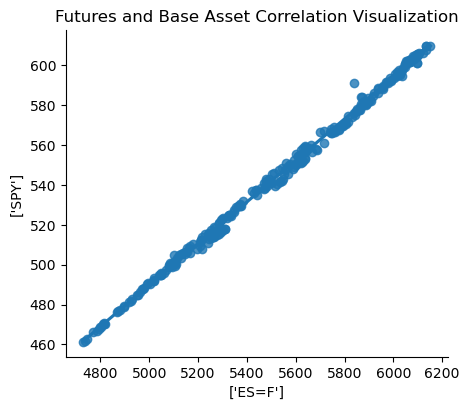

In [174]:
sns.lmplot(data = data_df, x = 'Adj Close_x', y = 'Adj Close_y', height = 4, aspect = 1.2);
plt.title("Futures and Base Asset Correlation Visualization")
plt.xlabel(Fticker)
plt.ylabel(Sticker)

In [175]:
#Calculating log returns for Standard deviation calculations
Flogreturns = np.log(Fdata/Fdata.shift(1))
Slogreturns = np.log(Sdata/Sdata.shift(1))

In [188]:
#Calculating Standard Deviations of Futures and Base Asset Returns
Fstd = Flogreturns.std()
Sstd = Slogreturns.std()

In [224]:
#Minimum Variance Hedge Ratio Formula = Correlation coefficient * (Standard Deviation of Spot Returns / Standard Deviation of Futures Returns)
hedge_ratio = correlation*(Sstd/Fstd)
ratio = hedge_ratio ['Adj Close']
print("The Minimum Variance Hedge Ratio is", ratio)

The Minimum Variance Hedge Ratio is 0.959069973716636


In [248]:
#Optimal Contract Amount Calculator
#Optimal Amount of Contracts Formula = (Position Size / One Futures Contract Size) * Minimum Variance Hedge Ratio
#Please Select the Position Type of the Base Asset Below (long or short)
position_type = ['long']
position_size = 10000000
futures_size = 306700
contract_amount = (position_size/futures_size)*hedge_ratio
output = contract_amount ['Adj Close']

if position_type == ['long']:
    print("The Optimal Amount of Contracts is", -output)
else:
    print("The Optimal Amount of Contracts is", output)

The Optimal Amount of Contracts is -31.270621901422757
